In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import missingno as msno

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv("./titanic/data/train.csv")
df_test = pd.read_csv("./titanic/data/test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
for col in df_train.columns :
    msg = 'column : {:>11}\t Count of NaN value : {:>3}\t Percent of NaN value : {:.2f}%'.format(col, df_train[col].isnull().sum(), 100*(df_train[col].isnull().sum()/df_train.shape[0]))
    print(msg)

column : PassengerId	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :    Survived	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :      Pclass	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :        Name	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :         Sex	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :         Age	 Count of NaN value : 177	 Percent of NaN value : 19.87%
column :       SibSp	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :       Parch	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :      Ticket	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :        Fare	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :       Cabin	 Count of NaN value : 687	 Percent of NaN value : 77.10%
column :    Embarked	 Count of NaN value :   2	 Percent of NaN value : 0.22%


In [8]:
for col in df_test.columns :
    msg = 'column : {:>11}\t Count of NaN value : {:>3}\t Percent of NaN value : {:.2f}%'.format(col, df_test[col].isnull().sum(), 100*(df_test[col].isnull().sum()/df_test.shape[0]))
    print(msg)

column : PassengerId	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :      Pclass	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :        Name	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :         Sex	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :         Age	 Count of NaN value :  86	 Percent of NaN value : 20.57%
column :       SibSp	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :       Parch	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :      Ticket	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :        Fare	 Count of NaN value :   1	 Percent of NaN value : 0.24%
column :       Cabin	 Count of NaN value : 327	 Percent of NaN value : 78.23%
column :    Embarked	 Count of NaN value :   0	 Percent of NaN value : 0.00%


<AxesSubplot:>

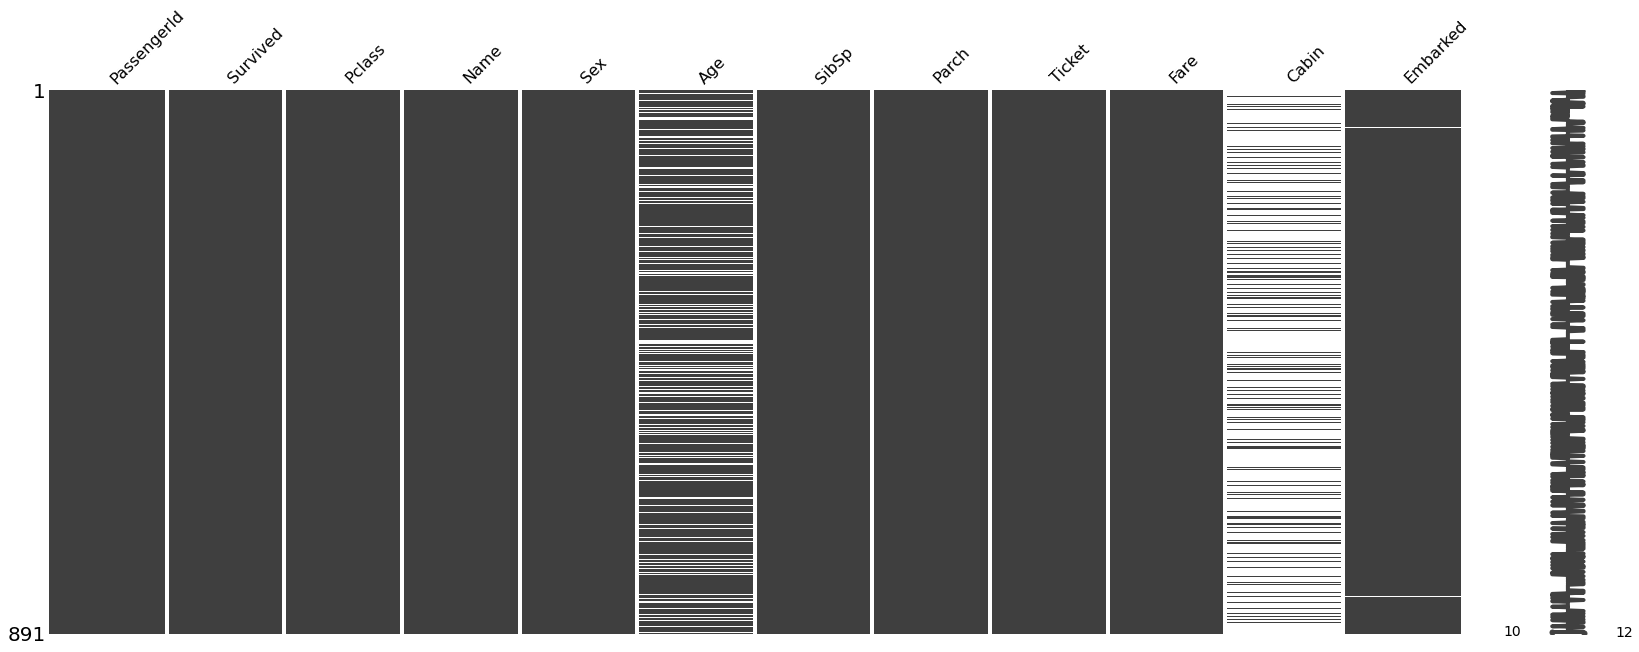

In [9]:
msno.matrix(df = df_train)

<AxesSubplot:>

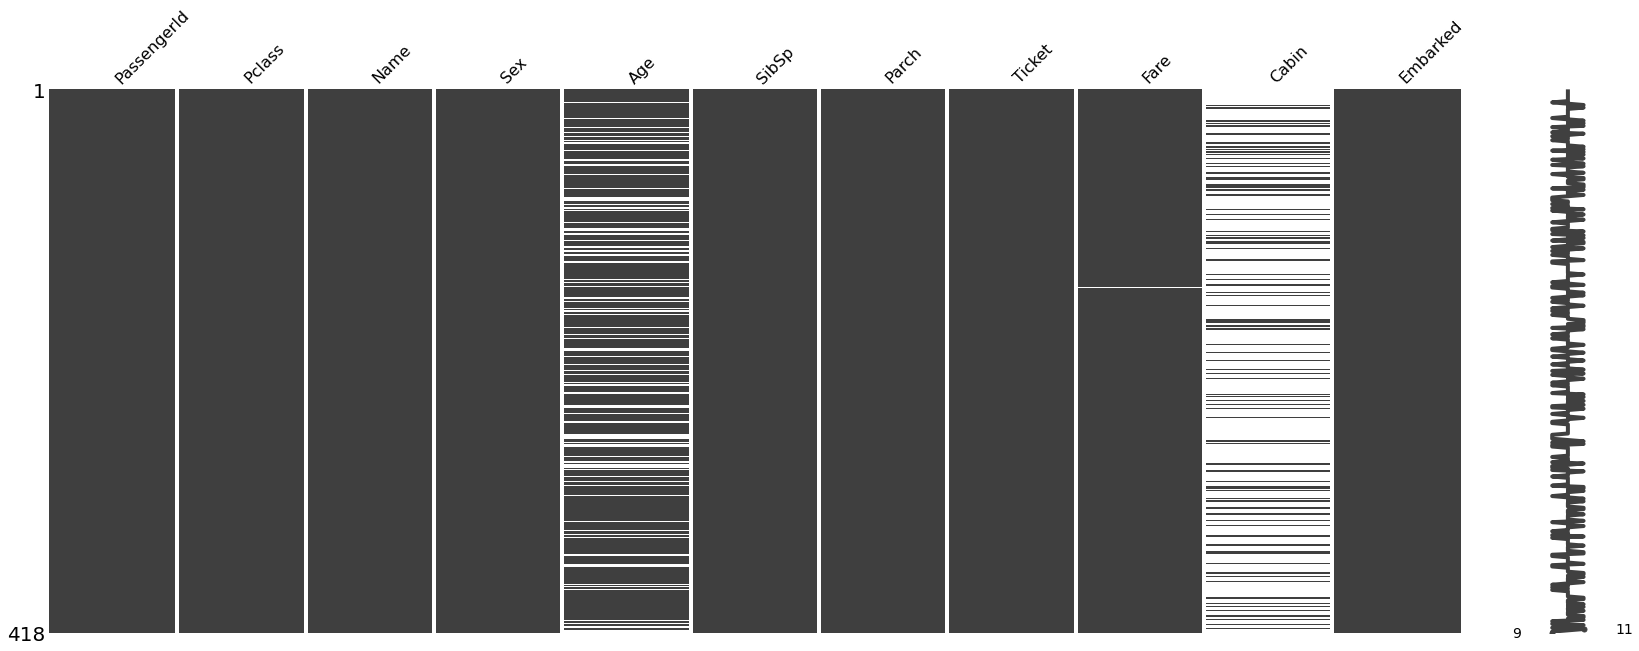

In [10]:
msno.matrix(df = df_test)

<AxesSubplot:>

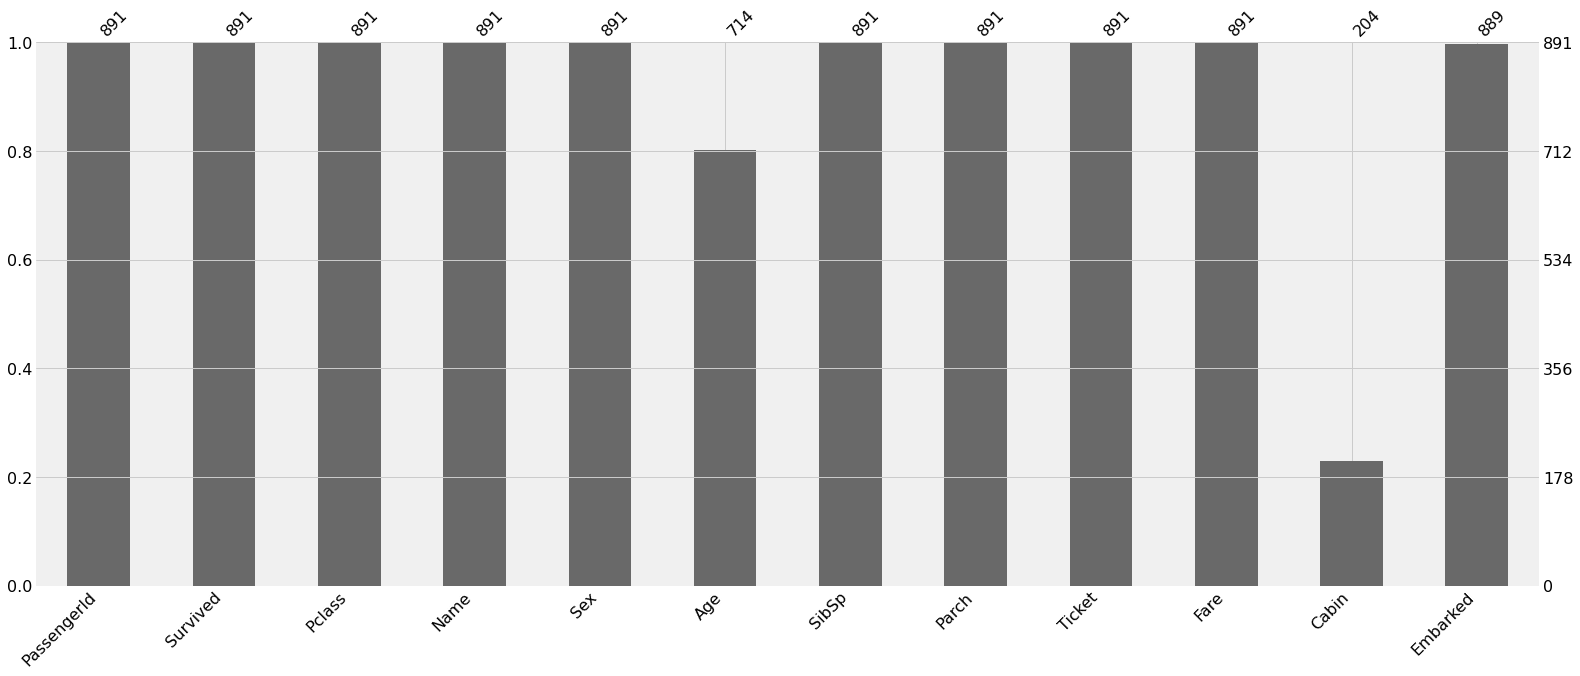

In [11]:
msno.bar(df = df_train)

<AxesSubplot:>

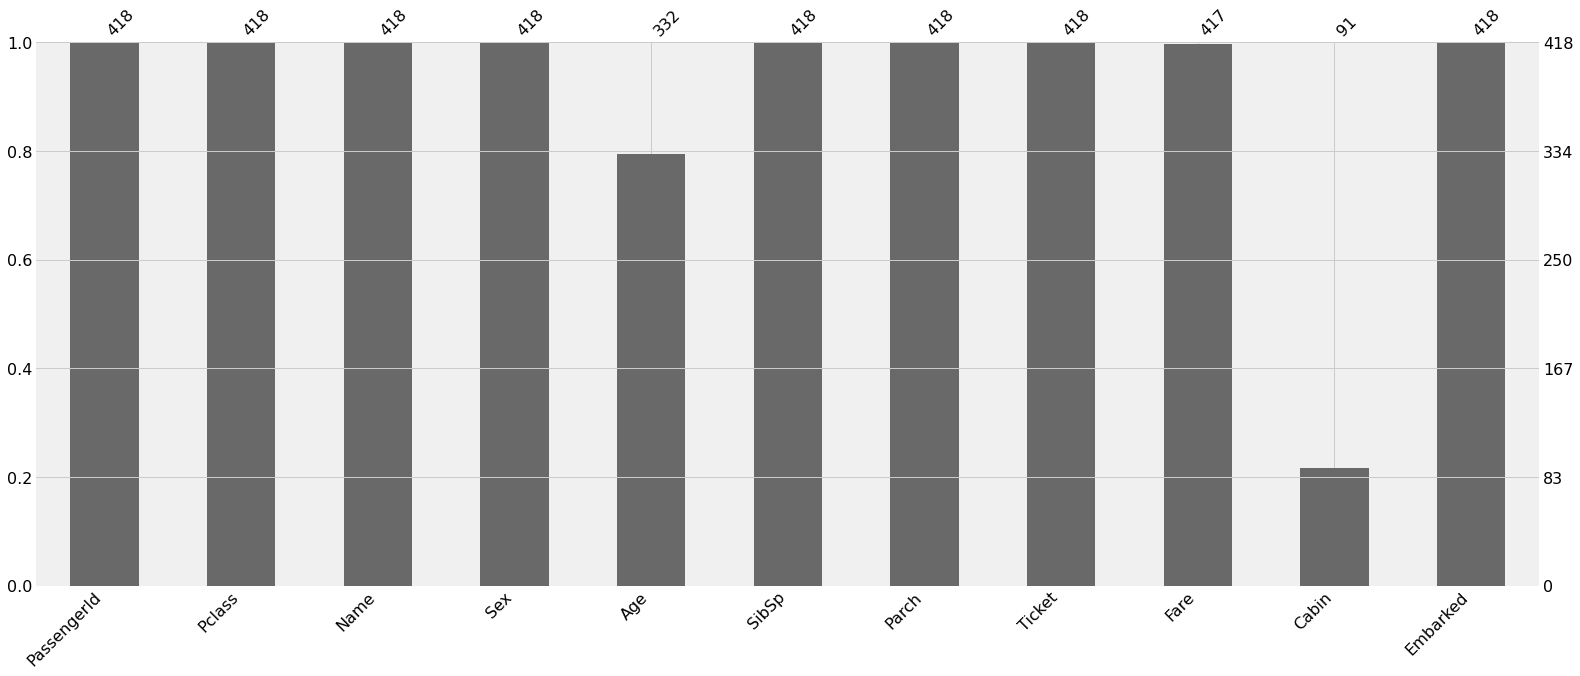

In [12]:
msno.bar(df = df_test)

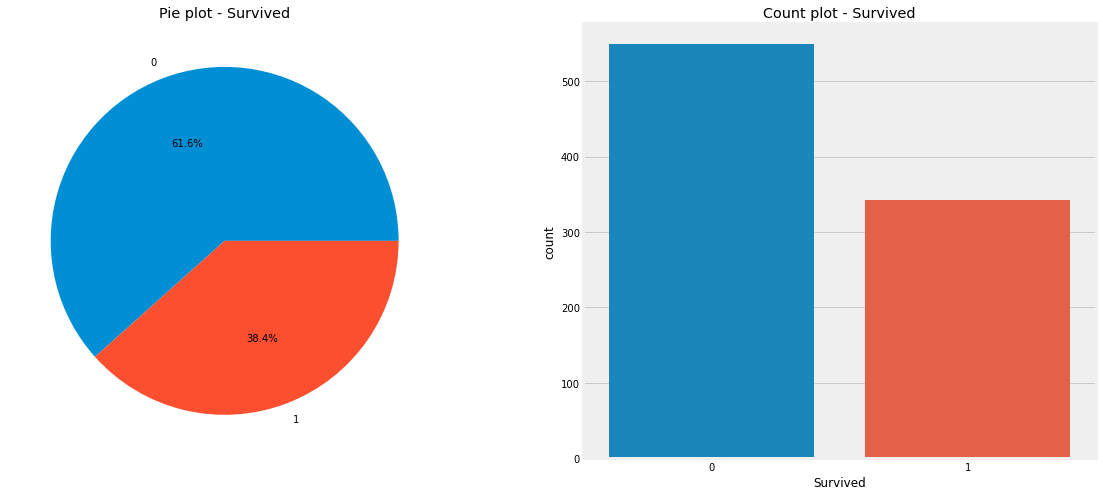

In [13]:
f, ax = plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title("Pie plot - Survived")
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

- imbalanced

#### Pclass

In [14]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


<AxesSubplot:xlabel='Pclass'>

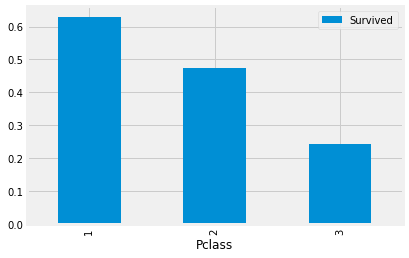

In [16]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

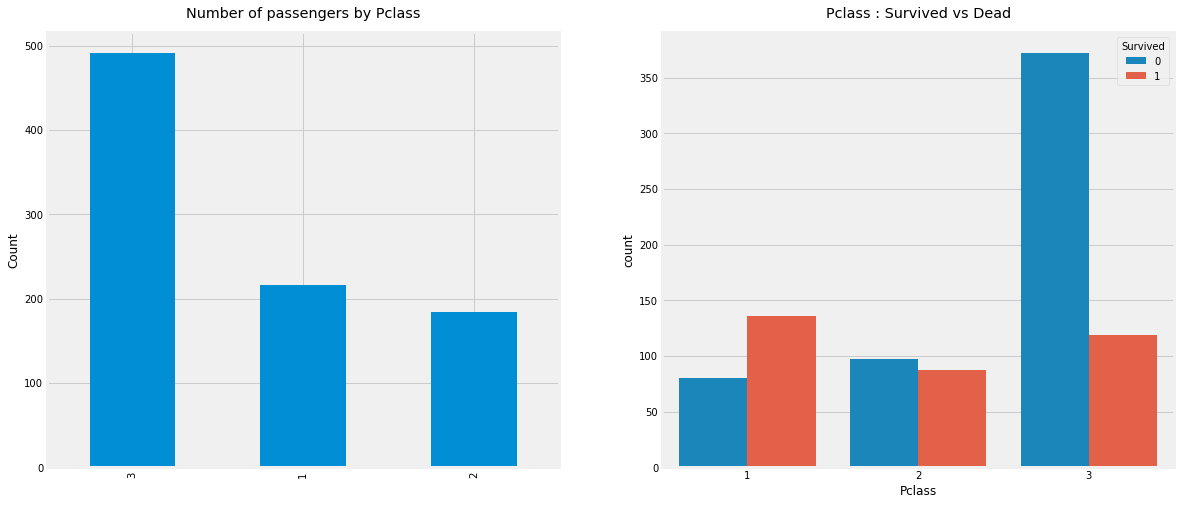

In [17]:
y_position = 1.02
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
# sns.countplot('Pclass', data=df_train)
ax[0].set_title("Number of passengers by Pclass", y= y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue="Survived", data=df_train, ax=ax[1])
ax[1].set_title("Pclass : Survived vs Dead", y=y_position)
plt.show()

#### Sex

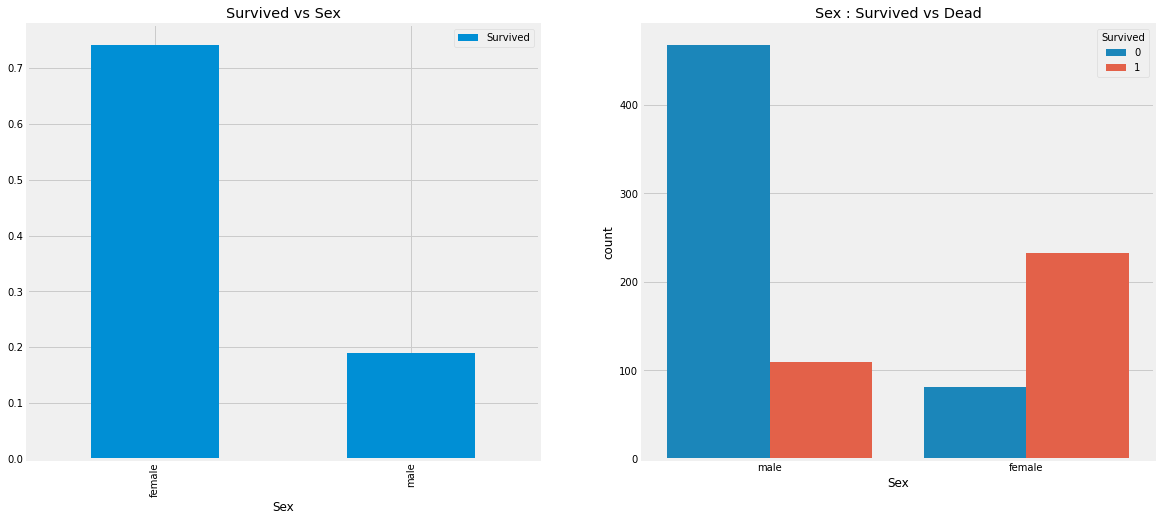

In [18]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue="Survived", data=df_train, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

#### Sex & Pclass

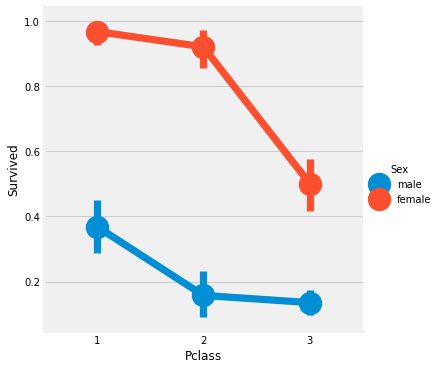

In [19]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train)

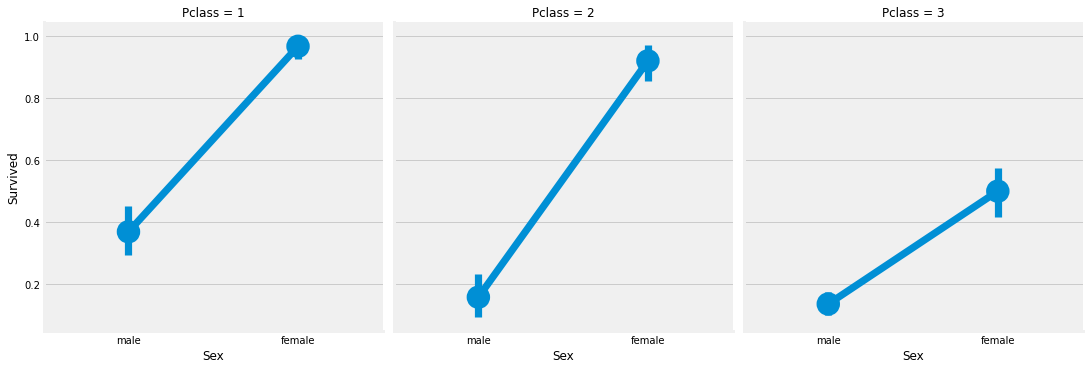

In [20]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train)

#### Age

In [21]:
df_train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

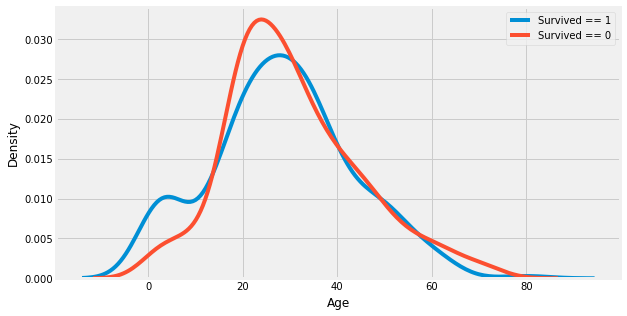

In [22]:
f, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

Text(0.5, 1.0, 'Age Distribution within classes')

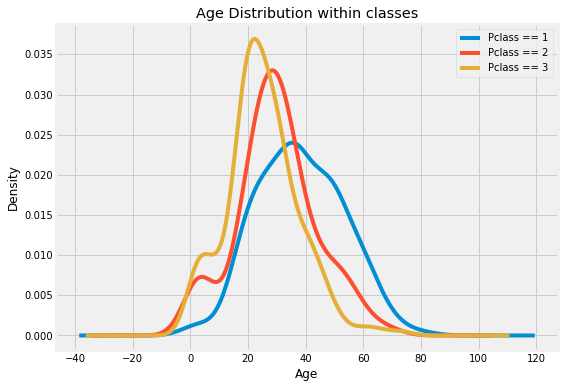

In [23]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')
plt.legend(['Pclass == 1', 'Pclass == 2', 'Pclass == 3'])

plt.xlabel('Age')
plt.title('Age Distribution within classes')

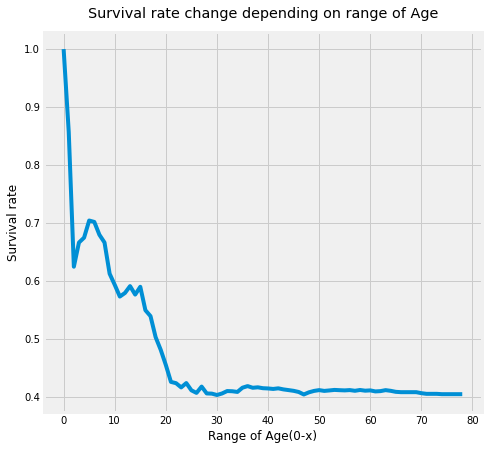

In [24]:
change_age_range_survival_ratio = []

for i in range(1, 80):
    change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0-x)')
plt.show()

#### Pclass, Age, Sex

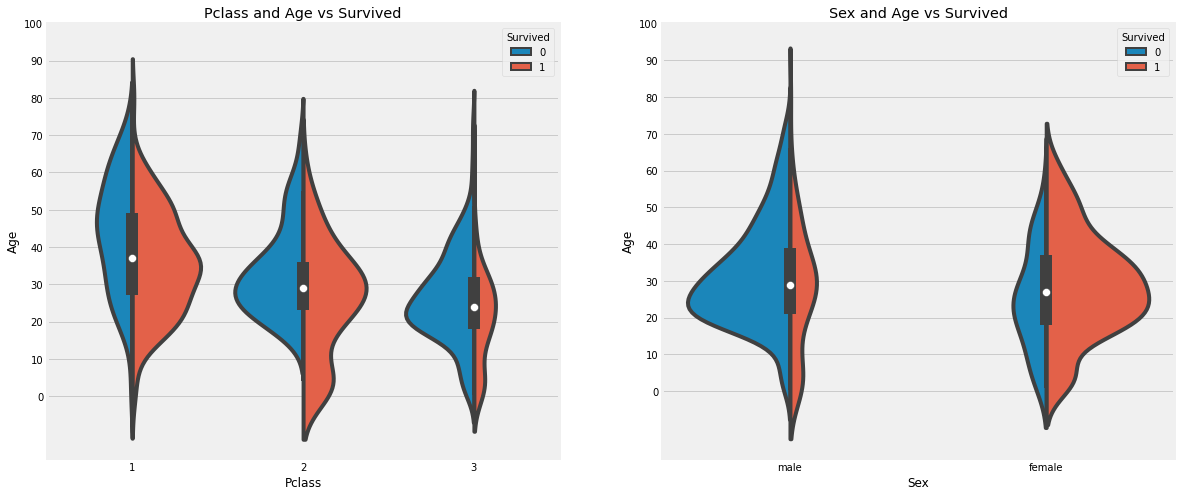

In [25]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex", 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### Embarked

<AxesSubplot:xlabel='Embarked'>

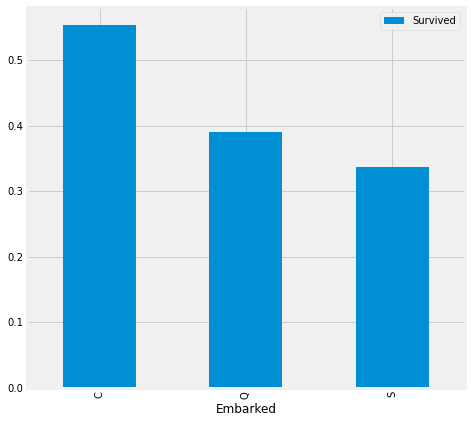

In [26]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().plot.bar(ax=ax)

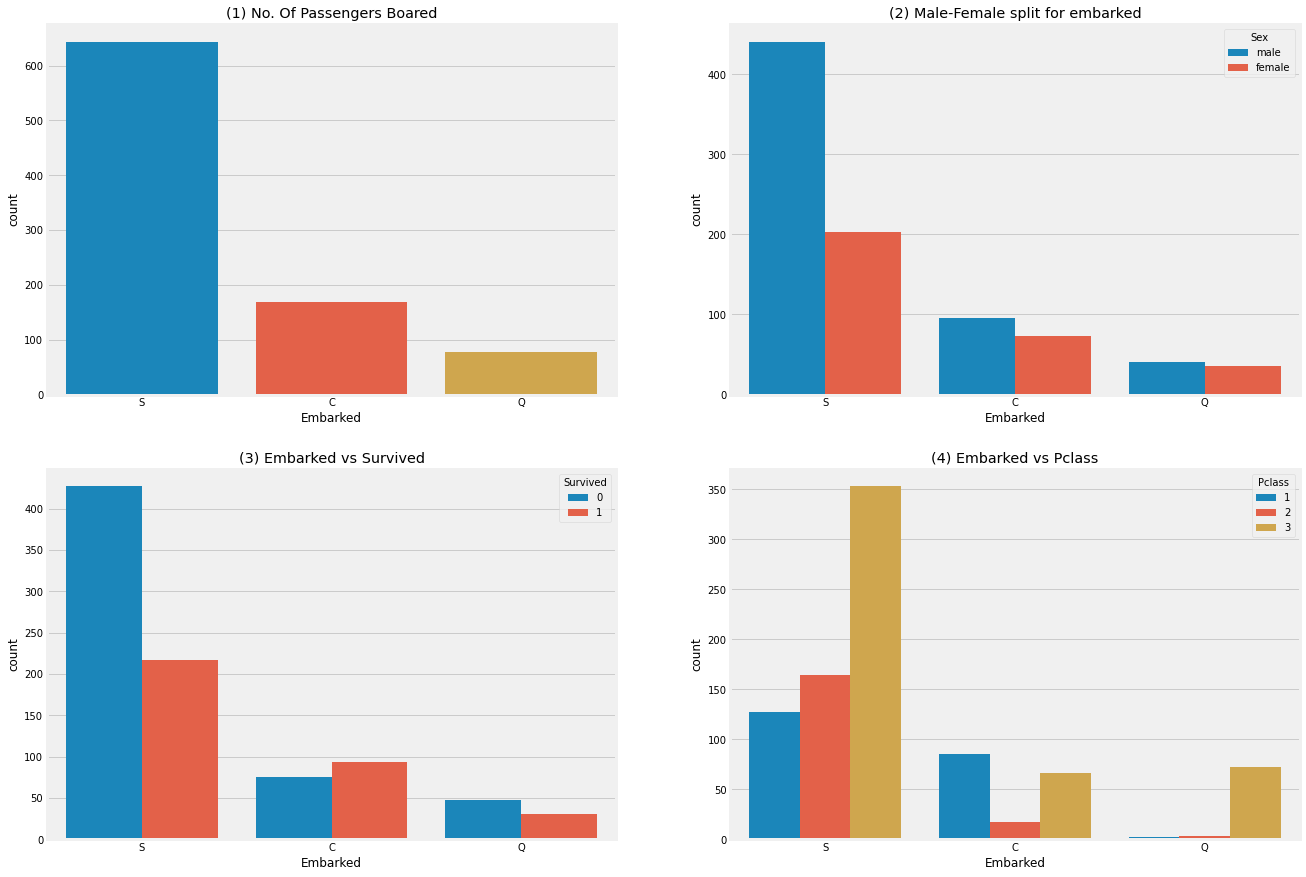

In [27]:
f, ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boared')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female split for embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.show()

#### Family = Sibsp  + Parch

In [28]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 #자신 포함

In [29]:
df_train.FamilySize.describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

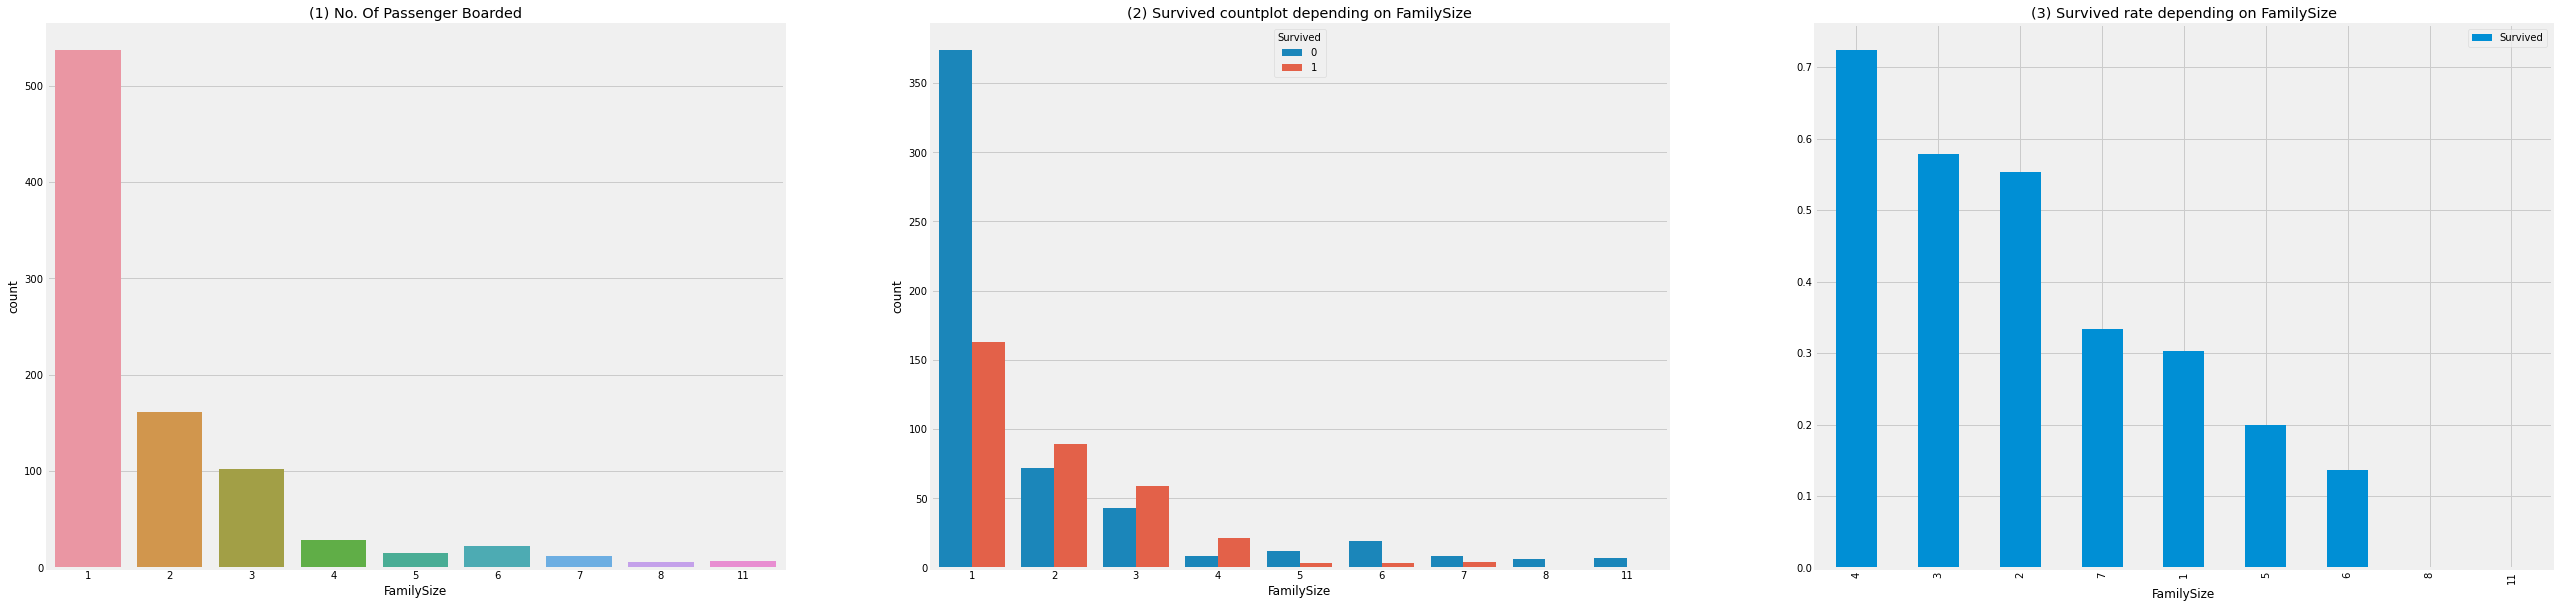

In [30]:
f, ax = plt.subplots(1,3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passenger Boarded')

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize')

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize')

plt.show()

#### Fare

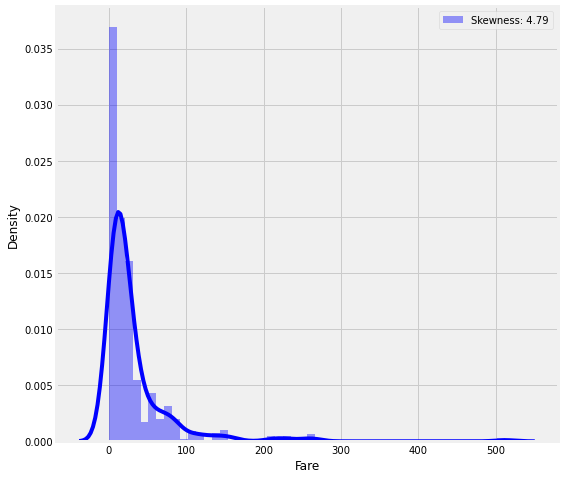

In [31]:
f, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [32]:
df_train['Fare'] = df_train['Fare'].map(lambda i:np.log(i) if i>0 else 0)

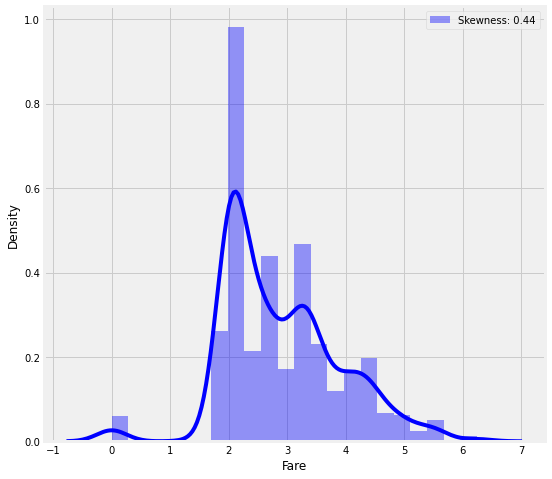

In [33]:
f, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

#### cabin
- null이 많아서 제외

#### Ticket

In [34]:
df_train['Ticket'].value_counts()

CA. 2343    7
347082      7
1601        7
CA 2144     6
347088      6
           ..
364500      1
693         1
111427      1
345779      1
2690        1
Name: Ticket, Length: 681, dtype: int64

### Feature engineering
#### null

In [35]:
df_train['Age'].isnull().sum()

177

In [36]:
df_train['Name'].str.extract('([A-Za-z]+)\.')

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [37]:
df_train['Initial'] = 

SyntaxError: invalid syntax (<ipython-input-37-fc3e94b00530>, line 1)